# Problem Set 1a 
## Computation ACME_Newton's Method
### 9. Newton's Method 


* July 1, 2019
* SP Tian 

In [1]:
from math import exp 
import scipy.optimize
import numpy as np 
import sympy as sy 
from matplotlib import pyplot as plt

In [2]:
# Exercise F(x) = x/2

F = lambda x: x/2
x0, tol, maxiters = 10, 1e-9, 8 
# maxiters is the maximum number of allowed iterations 
for k in range(maxiters): # Iterate at most N times. 
    print(x0, end = '  ')
    x1 = F(x0)            # Compute the next iteration. 
    if abs(x1 - x0) < tol: # Check for convergence. 
        break             # Upon convergence, stop iterating. 
    x0 = x1 


10  5.0  2.5  1.25  0.625  0.3125  0.15625  0.078125  

Newton's method converges quadratically, when the three math conditions hold (f and f' existing and continuous, f'(x) != 0, x0 is sufficiently close to x_bar), meaning that maximum error is squared at every iteration. 

### Problem 1 

Test the function with $f(x) = e^x - 2$ or $f(x) = x^4 - 3$ 

In [3]:
def newton_iteration(f, x0, F, tol=1e-5, maxiters=15): 
    # f is the function and F is the derivative function f' 
    converged = False
    for k in range(maxiters): 
        print(x0, end = '  ')
        x1 = x0 - f(x0)/F(x0)
        if abs(x1 - x0) < tol: 
            converged = True
            break 
        x0 = x1
    # a boolean value indicating whether or not the algorithm converged
    return x0, converged, k+1


In [4]:
f1 = lambda x: np.exp(x) - 2 
F1 = lambda x: np.exp(x) 

newton_iteration(f = f1, x0 = 2, F = F1)

2  1.2706705664732254  0.8319573037399686  0.7023505840171669  0.6931894022505122  0.6931471814512683  

(0.6931471814512683, True, 6)

In [5]:
scipy.optimize.newton(f1, x0 = 2)

0.6931471805599455

In [6]:
f2 = lambda x: x**4 - 3
F2 = lambda x: 4*x**3

newton_iteration(f2, x0 = 2, F = F2)

2  1.59375  1.3805806095506252  1.3204558637587656  1.3160957760892447  1.3160740134923037  

(1.3160740134923037, True, 6)

In [7]:
scipy.optimize.newton(f2, x0 = 2)

1.3160740129524926

> How to solve the problem with $f(x) = \frac{sin(x)}{x} - x$? 

Because the function is not continuous but can be by defining $f(0)=1$. 

In [8]:
# Exercise F(x) = sin(x)/x - x

def f3(x): 
    if x == 0: 
        f3 = 1
    else: 
        f3 = np.sin(x)/x - x 
    return f3

scipy.optimize.newton(f3, x0 = 5)

0.8767262153950612

In [9]:
x = sy.Symbol('x')
F3 = (sy.sin(x)/x - x).diff(x)
F3

-1 + cos(x)/x - sin(x)/x**2

In [10]:
newton_iteration(f3, x0 = 5, F = 
                 lambda x: -1 + np.cos(x)/x - np.sin(x)/x**2)

5  -0.7373456574446404  1.4118955771647257  0.8967683592708183  0.8767668019701448  0.8767262155635707  

(0.8767262155635707, True, 6)

### Problem 2 

**Equation**: $P_1[(1 + r)^{N_1} - 1] = P_2[1 - (1 + r)^{-N_2}]$

In [11]:
from autograd import grad, jacobian 
from autograd import numpy as anp

def problem2(N1, N2, P1, P2): 
    f = lambda r: P1*((1 + r)**N1 - 1) - P2*(1 - (1 + r)**(-N2))
    fp = grad(f)
    x = newton_iteration(f, 0.1, fp)[0]
    return x

problem2(30, 20, 2000, 8000)

0.1  0.07195340359845534  0.05239654166550936  0.042179097678923416  0.03907514716387125  0.03878102385998226  

0.03878102385998226

### Problem 3 

In [12]:
from autograd import grad

f = lambda x : np.sign(x) * np.power(np.abs(x), 1./3)
F0 = grad(f)
# The command x**(1/3) fails when x is negative 

In [13]:
def backtracking(f, x0, F, tol=1e-5, maxiters=50, alpha=1): 
    # f is the function and F is the derivative function f' 
    converged = False 
    for k in range(maxiters): 
        print(x0, end = '  ')
        x1 = x0 - alpha*f(x0)/F(x0)
        if abs(x1 - x0) < tol: 
# a boolean value indicating whether or not the algorithm converged
            converged = True
            break 
        x0 = x1
    return x0, converged, k+1, alpha


In [14]:
backtracking(f, x0 = 0.01, F = F0)

0.01  -0.019999999999999997  0.03999999999999999  -0.07999999999999996  0.15999999999999992  -0.31999999999999984  0.6399999999999997  -1.2799999999999994  2.5599999999999996  -5.120000000000001  10.240000000000004  -20.48000000000001  40.96000000000004  -81.9200000000001  163.84000000000026  -327.68000000000075  655.3600000000018  -1310.7200000000043  2621.4400000000105  -5242.880000000024  10485.760000000057  -20971.52000000013  41943.040000000314  -83886.08000000073  167772.16000000166  -335544.3200000037  671088.640000008  -1342177.2800000175  2684354.5600000387  -5368709.120000086  10737418.240000185  -21474836.480000395  42949672.96000086  -85899345.92000183  171798691.84000397  -343597383.6800085  687194767.3600183  -1374389534.720039  2748779069.440083  -5497558138.880177  10995116277.76037  -21990232555.52079  43980465111.041664  -87960930222.0835  175921860444.1674  -351843720888.3356  703687441776.6726  -1407374883553.3489  2814749767106.705  -5629499534213.425  

(11258999068426.879, False, 50, 1)

In [15]:
#F0 = lambda x: (1/3) * np.sign(x) * np.power(np.abs(x), -2/3)
# -120154863928566.72 
# 0.004062319826129509

backtracking(f, x0 = 0.01, F = F0, alpha = 0.4)

0.01  -0.0019999999999999983  0.0003999999999999989  -7.999999999999961e-05  1.599999999999986e-05  -3.199999999999966e-06  

(-3.199999999999966e-06, True, 6, 0.4)

### Problem 4 

Write a function same as Problem 3 except for $\alpha$, and then plot the values of $\alpha$ against the number of iterations. 

In [25]:
def newton_mod(f, x0, F, alpha, tol=1e-5, maxiters=50): 
    # f is the function and F is the derivative function f' 
    k = 0
    x1 = 10

    while k < maxiters and abs(x1 - x0) > tol: 
        x1 = x0 - alpha*f(x0)/F(x0)
        k += 1
    return x0, k


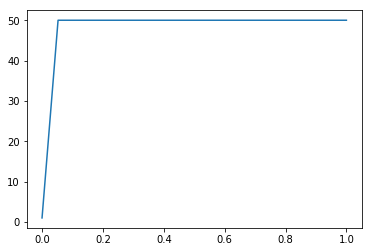

In [26]:
alpha_grid = np.linspace(0,1,20)
f0 = lambda x : np.sign(x) * np.power(np.abs(x), 1./3)
F0 = grad(f)
get_iter = np.zeros(20)

for i in range(20): 
    get_iter[i] = newton_mod(f0, 0.1, F0, alpha_grid[i])[1]
plt.plot(alpha_grid, get_iter)
plt.show()

0.01  -0.019999999999999997  0.03999999999999999  -0.07999999999999996  0.15999999999999992  -0.31999999999999984  0.6399999999999997  -1.2799999999999994  2.5599999999999996  -5.120000000000001  10.240000000000004  -20.48000000000001  40.96000000000004  -81.9200000000001  163.84000000000026  -327.68000000000075  655.3600000000018  -1310.7200000000043  2621.4400000000105  -5242.880000000024  10485.760000000057  -20971.52000000013  41943.040000000314  -83886.08000000073  167772.16000000166  -335544.3200000037  671088.640000008  -1342177.2800000175  2684354.5600000387  -5368709.120000086  10737418.240000185  -21474836.480000395  42949672.96000086  -85899345.92000183  171798691.84000397  -343597383.6800085  687194767.3600183  -1374389534.720039  2748779069.440083  -5497558138.880177  10995116277.76037  -21990232555.52079  43980465111.041664  -87960930222.0835  175921860444.1674  -351843720888.3356  703687441776.6726  -1407374883553.3489  2814749767106.705  -5629499534213.425  0.01  -0.019

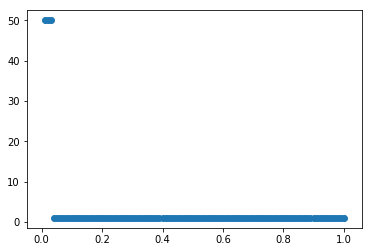

0.04

In [30]:
# This one is wrong and needs modification 

alpha_grid = np.linspace(0,1,101)
f0 = lambda x : np.sign(x) * np.power(np.abs(x), 1./3)
F0 = grad(f)

def newton_mod(f, x0, F, tol=1e-5, maxiters=50): 
    xpt = []
    ypt = []

    for alpha in alpha_grid: 
        xpt.append(alpha)
        ypt.append(backtracking(f, x0, F, alpha)[2])
    x = np.array(xpt[1: ])
    y = np.array(ypt[1: ])
    plt.scatter(x, y)
    plt.show()
    
    return x[np.argmin(y)] 

newton_mod(f = f0, x0 = 0.01, F = F0)

### Problem 7 

Write a function accepts $f : \mathbb{C} \to \mathbb{C}$ and its derivative $f' : \mathbb{C} \to \mathbb{C}$, an array **zeros** of the zeros of $f$, bonds $[r_{min}, r_{max}, i_{min}, i_{max}]$ for the domain of the plot, an interger **res**  that determines the resolution of the plot, and the number of interations **iters** to run the iteration. 

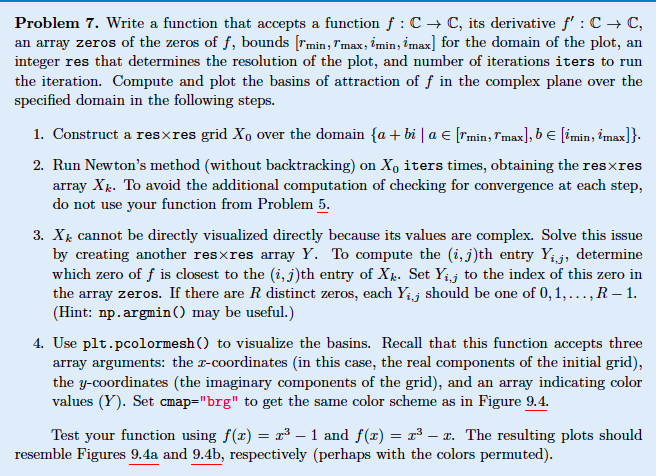

1. Construct a $res$ x $res$ grid $X_0$ over the domain $\{a + bi 
 |   a \in [r_{min}, r_{max}], b \in [i_{min}, i_{max}]\}$ 

In [61]:
def basins(f, fp, zeros, bounds, res, iters): 
    rmin, rmax, imin, imax = bounds 
    x_real= np.linspace(rmin, rmax, res)    # Real parts 
    x_imag = np.linspace(imin, imax, res)   # Imaginary parts 
    X_real, X_imag = np.meshgrid(x_real, x_imag) 
    X = X_real + 1j*X_imag                 # Combine real and imaginary parts 
    Y = np.zeros((res, res))

    for i in range(res): 
        for j in range(res): 
            x0 = X[i, j]
            for k in range(iters): 
                x1 = x0 - f(x0)/fp(x0)
                if abs(x1 - x0) < 1e-5: 
                    break 
                x0 = x1 
            Y[i, j] = np.argmin(np.abs(zeros - x0))
    return x_real, x_imag, Y 


2. Run Newton's method (without backtracking) on $X_0 iters$ times, obtaining the $res$ x $res$ array $X_k$. 

In [62]:
bounds = [-1.5, 1.5, -1.5, 1.5]
f = lambda x: x**3 - 1
fp = lambda x: 3*x**2

g = lambda x: x**3 - x
gp = lambda x: 3*x**2 - 1

print("f(x) = x^3 - 1 result is", scipy.optimize.newton(f, x0 = 10))
print("f(x) = x^3 - x result is", scipy.optimize.newton(g, x0 = 5))

f(x) = x^3 - 1 result is 1.0000000000000016
f(x) = x^3 - x result is 1.000000000000166


3. Create another $res$ x $res$ array $Y$. To computer the $(i,j)$th entry $Y_{i,j}$, determine which zero of $f$ is closest to the $(i,j)$th entry of $X_k$. Set $Y_{i,j}$ to the index of this zero in the array $zeros$. 
```np.argmin()```

4. ```plt.pcolormesh()```

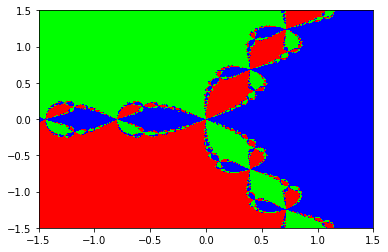

In [67]:
zeros = np.array([1, -1/2 + np.sqrt(3)/2j, -1/2 - np.sqrt(3/2)/1j])

real, imag, y = basins(f, fp, zeros, bounds, 500, 100)
plt.pcolormesh(real, imag, y, cmap = "brg")
plt.show()

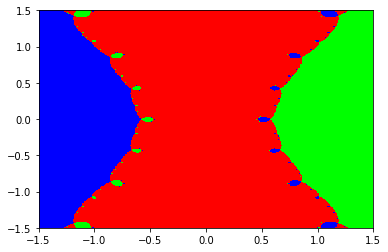

In [70]:
exe2 = np.array([-1, 0, 1])

real, imag, y = basins(g, gp, exe2, bounds, 500, 100)
plt.pcolormesh(real, imag, y, cmap = "brg")
plt.show()